# Simon's algorithm

In [1]:
from openql import openql as ql
import numpy as np
from utils import simulate, plot_histogram, random_state

In [2]:
ql.initialize()
compiler = ql.Compiler("compiler", "./config/compiler-config.json")

platform = ql.Platform("platform", "none")
platform.set_compiler(compiler=compiler)


In [3]:
def oracle(nqubits: int, k: ql.Kernel, secret: str):
    for q in range(nqubits):
        k.cnot(q, q + nqubits)

    # sum = 0

    # for i in range(len(secret)):
    #     sum += secret[i]

    # if sum != 0:
    #     for i in range(len(secret)):
    #         if secret[i] == 1:
    #             value = i
    #             for i in range(len(secret)):
    #                 if secret[i] == 1:
    #                     k.cnot(value, nqubits + i)
    #             break

    if "1" in secret:
        for i, q in enumerate(secret):
            if q == "1":
                value = i
                for i, q in enumerate(secret):
                    if q == "1":
                        k.cnot(value, nqubits + i)
                break


In [4]:
nqubits = 3

secret = random_state(nqubits)
print(f"{secret=}")

program = ql.Program("simons", platform, 2 * nqubits)
k = ql.Kernel("kernel", platform, 2 * nqubits)

for q in range(nqubits):
    k.hadamard(q)

oracle(nqubits, k, secret)

for q in range(nqubits):
    k.hadamard(q)

for q in range(nqubits):
    k.measure(q)

program.add_kernel(k)
program.compile()


secret='111'


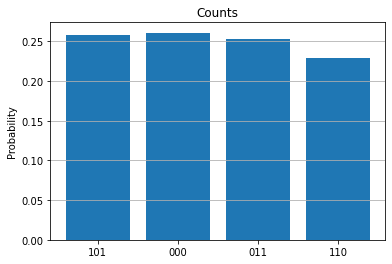

In [5]:
counts = simulate(program=program, measured=range(nqubits), shots=1024)
plot_histogram(counts=counts)


In [6]:
# Na podstawie wyników można znaleźć secret (można to też dodać)

## Na podstawie wyników można znaleźć secret (można to też dodać)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dedd1051-cb34-4841-b8e5-79089caae121' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>